In [1]:
import pandas as pd
from math import sqrt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from matplotlib import pyplot as plt
from sklearn import metrics

In [2]:
# read the data
preprocessed_data = pd.read_pickle('../data/preprocessed_twitter_quantitative.pd')

# Create a dataframe
df = pd.DataFrame(preprocessed_data)
y = df['score'].copy()
df.drop('score', axis=1, inplace=True) 

In [3]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [4]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

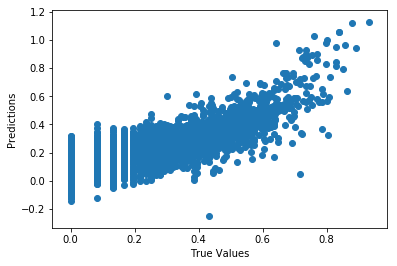

[  1.64854411e-04   4.29628219e-05  -3.48041844e-02   1.75415922e-01
  -1.10393955e+01   1.04633504e+00  -9.87414970e+01  -1.20275934e-03
   1.71837887e-04  -1.40615211e+00   9.43149702e-01   6.83691914e+01
  -6.04778571e-01  -5.40151636e-04   2.98364363e-04   1.53352004e-03
  -2.56505609e-04   3.63926377e-01  -1.94137253e-01  -2.08365556e-02
   3.36371574e-01  -3.86529860e+01   1.22245872e+00  -1.57308845e+00
  -2.16172470e-02   3.87775445e+02  -1.80611110e+02   4.70140066e-07
   6.11073469e-03  -1.33854323e-05   1.23899656e-03  -1.79358910e-05
   8.11047627e-05  -1.61142350e-05   4.94961942e-05]


In [5]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

print(lm.coef_)

In [6]:
scores = cross_val_score(model, df, y, cv=4)
print("Cross-validated scores:", scores)

Cross-validated scores: [ 0.68626978  0.70520776  0.69406439  0.61687095]


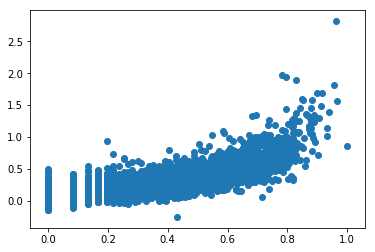

In [7]:
predictions = cross_val_predict(model, df, y, cv=4)
plt.scatter(y, predictions)
plt.show()

In [8]:
print(y.shape)
print(predictions.shape)
accuracy = metrics.r2_score(y, predictions)
print("R2Score:", accuracy)
rmse = sqrt(metrics.mean_squared_error(y,  predictions))
print("RMSE:", rmse)

(23350,)
(23350,)
R2Score: 0.687116055479
RMSE: 0.10973549899417136


In [9]:
print(lm.coef_)

[  1.64854411e-04   4.29628219e-05  -3.48041844e-02   1.75415922e-01
  -1.10393955e+01   1.04633504e+00  -9.87414970e+01  -1.20275934e-03
   1.71837887e-04  -1.40615211e+00   9.43149702e-01   6.83691914e+01
  -6.04778571e-01  -5.40151636e-04   2.98364363e-04   1.53352004e-03
  -2.56505609e-04   3.63926377e-01  -1.94137253e-01  -2.08365556e-02
   3.36371574e-01  -3.86529860e+01   1.22245872e+00  -1.57308845e+00
  -2.16172470e-02   3.87775445e+02  -1.80611110e+02   4.70140066e-07
   6.11073469e-03  -1.33854323e-05   1.23899656e-03  -1.79358910e-05
   8.11047627e-05  -1.61142350e-05   4.94961942e-05]
